## import required librabries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## import file

In [ ]:
iris = pd.read_csv("Iris.csv")

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## create dataset which removed with class(species) labele

In [11]:
dataset = iris.drop(['Species'], axis =1)

In [12]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


##  transorm the data into standardscaler form

In [14]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
cleaneddata = pd.DataFrame(standard.fit_transform(dataset))

In [16]:
cleaneddata.head()

,0,1,2,3,4
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


In [21]:
cleaneddata.shape

(150, 5)

## import minisom library 

In [18]:
!pip install minisom


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from minisom import MiniSom

In [25]:
som = MiniSom(7,7,5,sigma =0.25)

som.train_random(cleaneddata.to_numpy(), 30000)

## convert  Specied to numerical category

In [35]:
target1 = iris.Species.astype('category')

In [37]:
target = target1.cat.codes

In [39]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [47]:
label_map = som.labels_map(cleaneddata.to_numpy(), target)

In [48]:
label_map

defaultdict(list,
            {(3, 0): Counter({0: 22}),
             (1, 4): Counter({0: 27}),
             (4, 2): Counter({0: 1}),
             (5, 2): Counter({1: 2}),
             (5, 3): Counter({1: 4}),
             (1, 5): Counter({1: 2}),
             (1, 0): Counter({1: 3}),
             (0, 1): Counter({1: 3}),
             (0, 0): Counter({1: 2}),
             (4, 6): Counter({1: 9}),
             (2, 3): Counter({1: 4}),
             (4, 5): Counter({1: 6}),
             (6, 3): Counter({1: 10}),
             (2, 4): Counter({1: 3}),
             (5, 4): Counter({1: 2}),
             (3, 6): Counter({2: 7}),
             (0, 4): Counter({2: 5}),
             (5, 0): Counter({2: 4}),
             (6, 6): Counter({2: 10}),
             (2, 2): Counter({2: 5}),
             (3, 5): Counter({2: 1}),
             (4, 3): Counter({2: 6}),
             (2, 5): Counter({2: 3}),
             (4, 4): Counter({2: 1}),
             (0, 6): Counter({2: 8})})

In [50]:
label_name = np.unique(target)

In [51]:
label_name

array([0, 1, 2], dtype=int8)

In [55]:
from matplotlib.gridspec import GridSpec

## visual form

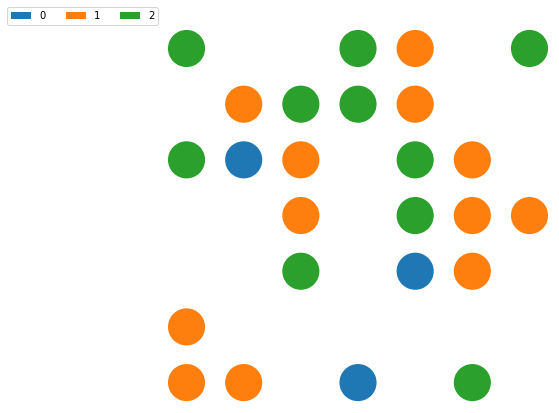

In [58]:
plt.figure(figsize =(7,7))
the_grid = GridSpec(7,7)

for position in label_map.keys():
    label_fracs = [label_map[position][l] for l in label_name]
    plt.subplot(the_grid[6-position[1],position[0]],aspect =1)
    patches,texts = plt.pie(label_fracs)
plt.legend(patches, label_name, bbox_to_anchor=(0,1.5), ncol=3)

plt.show()

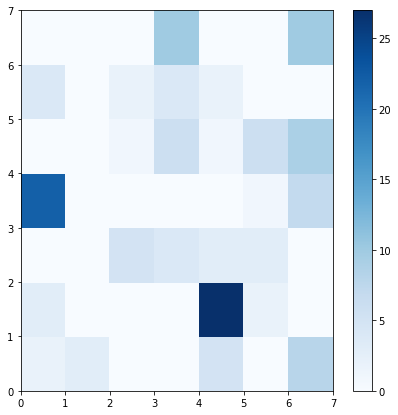

In [61]:
plt.figure(figsize =(7,7))
frequency = np.zeros((7,7))
for position, values in som.win_map(cleaneddata.to_numpy()).items():
    frequency[position[0], position[1]] = len(values)
plt.pcolor(frequency,cmap= 'Blues')
plt.colorbar()
plt.show()